# Hand written digits recognition



1. This data set aims at developing a model that can identify the digit handwritten in the image.
2. Since keras fails to work in jupyter notebook, i did the code in google colab notebook, and it works.
3. We import the data from MNIST dataset availabe in keras datasets by default and use it to train, validate and test our model
4. We use a CNN model for this, with two sets of convolution and pooling layers followed by 3 dense layers.
5. We scaled the training dataset by dividing it by 255 and one-hot encoded the categorical variable y into 10 categories, each representing one of ten digits.


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Loading the data set and basic data checks like observing its shape and size

In [ ]:
(X_train,Y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
print(len(X_train), X_train.shape)

60000 (60000, 28, 28)


In [ ]:
X_train[0].shape

(28, 28)

Data Preprocessing:
1. Checking the images as to know how they look like using imshow command of matplotlib),else it looks like a array of values of pixels
2. Observing the counts of each category to see if the data is approximately balanced or not. Else, we may need to augment/smote the data
3. Then we'll proceed with scaling the data
4. Then encoding the data


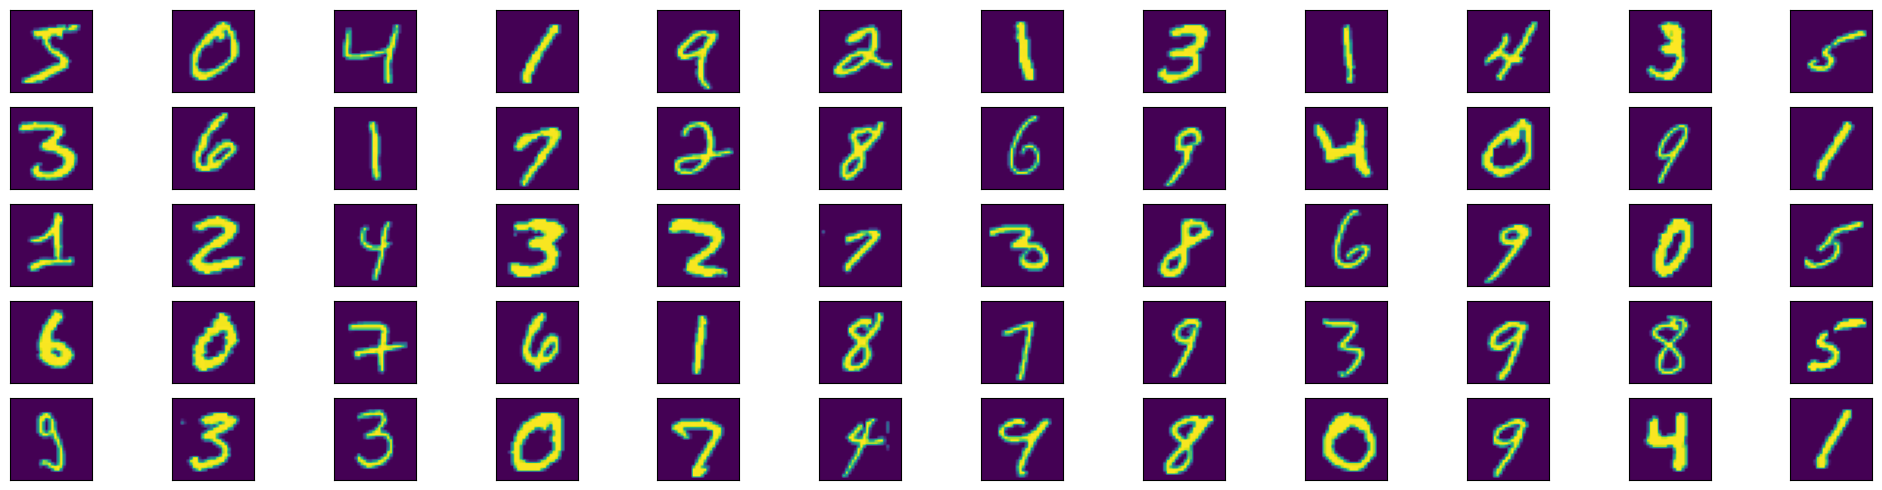

In [ ]:
fig = plt.figure(figsize = (20,5))
for i in range(60):
    ax = fig.add_subplot(5,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))
plt.tight_layout()

In [ ]:
Y_train[:60]    #Checking for output values

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1], dtype=uint8)

In [ ]:
unique,frequency = np.unique(Y_train, return_counts=True)
print(unique, frequency)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


The frequency counts are decently close to each other, so the data can be said to be balanced.

<BarContainer object of 10 artists>

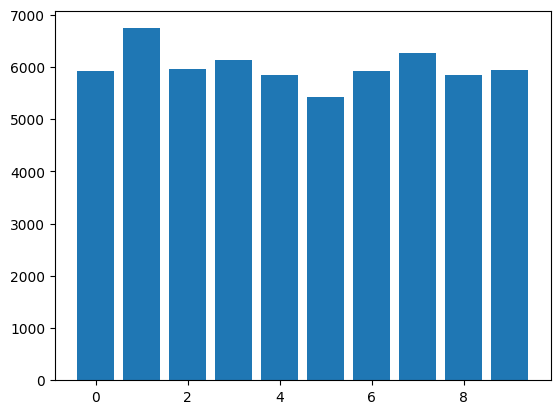

In [ ]:
plt.bar(unique,frequency)

Bar plot of counts of categories of ytrain shows that the training data is reasonably balanced

In [ ]:
#Data Preprocessing - Scaling and Encoding
X_train = X_train.astype('float32')/255 #Scaling for training data
x_test = x_test.astype('float32')/255 #Scaling for testing data

In [ ]:
#Checking for unique values
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from keras.utils import to_categorical

In [ ]:
#This is a multiclass classification, where we are expecting to get a one hot encoded output of my classification
Y_train = keras.utils.to_categorical(Y_train,10,int)
y_test = keras.utils.to_categorical(y_test,10,int)

In [ ]:
#Cross checking encoded values
Y_train[:60]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0,

In [ ]:
#Creating validation data for neural networks by taking first 5000 inputs, as validation data and rest 55000 as training data
(x_train,x_valid) = (X_train[5000:],X_train[:5000])
(y_train,y_valid) = (Y_train[5000:],Y_train[:5000])

In [ ]:
#Confirming the lengths
len(x_train),len(y_train),len(x_valid),len(y_valid)

(55000, 55000, 5000, 5000)

In [ ]:
#Importing sequential model from keras and adding 2 pairs of convolution and pooling layers, 3 dense layers
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=2,activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 500)              

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#Testing the training accuracy for 1 epoch
#model.fit(x_train,y_train,epochs=1)
#Training for 10 epochs with validation data given
history = model.fit(x_train,y_train,epochs=10,validation_data = (x_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 82s 47ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0858 - val_accuracy: 0.9902
Epoch 2/10
1719/1719 [==============================] - 87s 51ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0753 - val_accuracy: 0.9906
Epoch 3/10
1719/1719 [==============================] - 80s 46ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0966 - val_accuracy: 0.9910
Epoch 4/10
1719/1719 [==============================] - 80s 47ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.1068 - val_accuracy: 0.9914
Epoch 5/10
1719/1719 [==============================] - 80s 47ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0822 - val_accuracy: 0.9922
Epoch 6/10
1719/1719 [==============================] - 80s 46ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1032 - val_accuracy: 0.9904
Epoch 7/10
1719/1719 [==============================] - 79s 46ms/step - loss: 8.4652e-04 - accuracy: 0.9997 - val_loss: 0.09

In [ ]:
#Evaluating the model on the data
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0634 - accuracy: 0.9903


[0.06342262774705887, 0.9902999997138977]

In [ ]:
# Visualising the training accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)


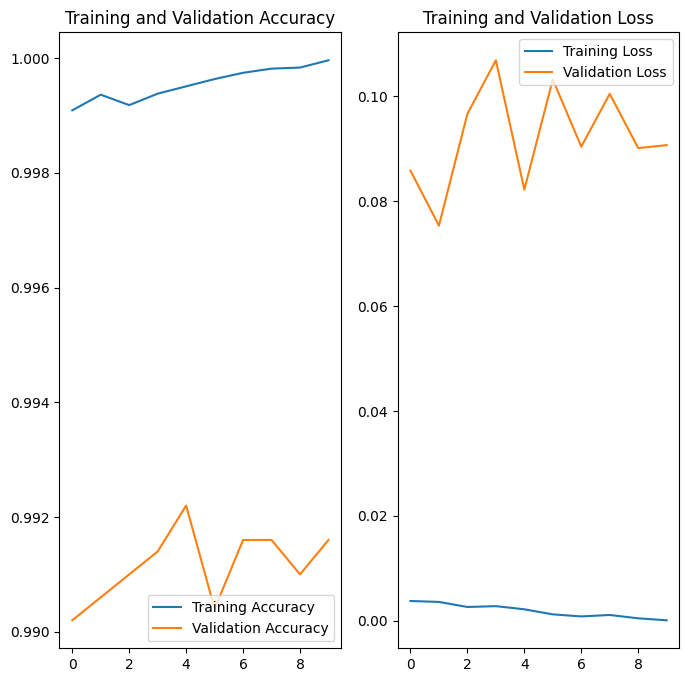

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Summary
1. The data is imported and is verified to be balanced
2. We scaled it and categorised the output variable into 10 categories using one hot encoding avaialbe in keras
3. A CNN model is formed by using two pairs of convolution and pooling layers, with one flattening and three dense layers
4. The model had excellent performance as evident from values of loss and accuracy in the first epoch.
5. Since the training data was huge, the model could train well and could get an accuracy of 99.91% on training data, and 99.01% on validation data in first epoch itself.
6. In training phase, the model loss started from 0.0038 and decreased to 1.1272e-04 by the end of tenth epoch. Therefore the accuracy rose from 99.91% to 100% in ten epochs. The validation accuracy rose from 99.01% to 99.16% in ten epochs.
7. On testing data, the model gave 99.03% accuracy with a loss of 0.0634, which shows that the model has been great in identifying the handwritten digit correctly.